In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [205]:
pd.set_option('display.max_columns',None)

In [206]:
dt=pd.read_csv(r"C:\Users\admin\Desktop\Project data\VSPA\MoviesOnStreamingPlatforms_updated.csv", index_col = 0)
dt=dt.drop(['ID'], axis = 1) 

In [207]:
dt.rename(columns ={'Prime Video':'Prime'},inplace=True)

In [208]:
dt["Prime"].value_counts()

1    12354
0     4390
Name: Prime, dtype: int64

In [209]:
data=dt.drop(['Rotten Tomatoes','Type'],axis=1)

In [210]:
data

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,13+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,13+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
16742,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN


In [211]:
data['Age'].isnull().values.any()

True

In [212]:
data.dropna(axis=0,how='any').shape

(7046, 13)

In [213]:
data.dropna(axis=0,how='any',inplace=True)

In [214]:
data['Age'] = data['Age'].replace(['all'],'18+')

In [215]:
data.dropna(subset=['Age'],how='all').shape

(7046, 13)

In [216]:
data['Age'].fillna(value='18')

0        13+
1        13+
2        13+
3        13+
4        13+
        ... 
16726    18+
16727    18+
16737    18+
16738    18+
16740     7+
Name: Age, Length: 7046, dtype: object

In [217]:
data.sort_values(by="IMDb",ascending=False).head(10)

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
7491,Finding Family,2013,13+,9.1,0,0,1,0,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War","United Kingdom,Bosnia and Herzegovina","Bosnian,English",56.0
3560,The Dark Knight,2008,13+,9.0,0,1,0,0,Christopher Nolan,"Action,Crime,Drama,Thriller","United States,United Kingdom","English,Mandarin",152.0
4829,The Mountain II,2016,18+,8.9,0,0,1,0,Alper Caglar,"Action,Drama,War",Turkey,Turkish,135.0
6840,Peter Gabriel: Secret World Live,1993,18+,8.9,0,0,1,0,François Girard,"Documentary,Music",Canada,English,102.0
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
7643,Machine Gun Preacher Documentary,2014,16+,8.8,0,0,1,0,"Kevin Evans,Zac Simpson",Documentary,"United States,Australia",English,73.0
8247,Memories 677,2011,13+,8.8,0,0,1,0,"Kôji Morimoto,Tensai Okamura,Katsuhiro Ôtomo","Animation,Comedy,Fantasy,Horror,Sci-Fi,Thriller",Japan,"Japanese,English,Italian",113.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
9213,Street Dogs of South Central,2013,18+,8.8,0,0,1,0,Bill Marin,Documentary,United States,English,83.0
5153,Anand,1971,18+,8.7,0,0,1,0,Hrishikesh Mukherjee,"Drama,Musical",India,Hindi,122.0


In [218]:
data[(data["IMDb"]>=5)&(data["Year"]==2020)].count()

Title        33
Year         33
Age          33
IMDb         33
Netflix      33
Hulu         33
Prime        33
Disney       33
Directors    33
Genres       33
Country      33
Language     33
Runtime      33
dtype: int64

In [219]:
Ages=data.Age.unique()

In [220]:
Ages=data.groupby('Age').Title.count()

In [221]:
data['IMDb'].round(decimals=0)

0        9.0
1        9.0
2        8.0
3        8.0
4        9.0
        ... 
16726    4.0
16727    4.0
16737    6.0
16738    5.0
16740    5.0
Name: IMDb, Length: 7046, dtype: float64

In [222]:
data

,Title,Year,Age,IMDb,Netflix,Hulu,Prime,Disney,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,13+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,13+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,13+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,Richie Rich's Christmas Wish,1998,18+,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0
16727,The Jungle Book: Mowgli's Story,1998,18+,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0
16737,The Bears and I,1974,18+,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0
16738,Whispers: An Elephant's Tale,2000,18+,5.0,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0


In [223]:
data.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Netflix', 'Hulu', 'Prime', 'Disney',
       'Directors', 'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [224]:
one_hot_data = pd.get_dummies(data[['Netflix','IMDb','Genres','Prime','Disney','Hulu']])

In [225]:
one_hot_data

Netflix  IMDb  Prime  Disney  Hulu  Genres_Action  \
0            1   8.8      0       0     0              0   
1            1   8.7      0       0     0              0   
2            1   8.5      0       0     0              0   
3            1   8.5      0       0     0              0   
4            1   8.8      1       0     0              0   
...        ...   ...    ...     ...   ...            ...   
16726        0   4.1      0       1     0              0   
16727        0   4.2      0       1     0              0   
16737        0   6.2      0       1     0              0   
16738        0   5.0      0       1     0              0   
16740        0   4.7      0       1     0              0   

       Genres_Action,Adventure  Genres_Action,Adventure,Biography  \
0                            0                                  0   
1                            0                                  0   
2                            0                                  0   
3                            0                                  0   
4                            0                                  0   
...                        ...                                ...   
16726                        0                                  0   
16727                        0                                  0   
16737                        0                                  0   
16738                        0                                  0   
16740                        0                                  0   

       Genres_Action,Adventure,Biography,Drama,History  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
16726                                                0   
16727                                                0   
16737                                                0   
16738                                                0   
16740                                                0   

       Genres_Action,Adventure,Biography,Drama,Romance  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
16726                                                0   
16727                                                0   
16737                                                0   
16738                                                0   
16740                                                0   

       Genres_Action,Adventure,Comedy  Genres_Action,Adventure,Comedy,Crime  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     0   
...                               ...                                   ...   
16726                               0                                     0   
16727                               0                                     0   
16737                               0                                     0   
16738                               0                                     0   
16740                               0                                     0   

       Genres_Action,Adventure,Comedy,Crime,Drama,Thriller  \
0                                                   

In [226]:
one_hot_data = pd.get_dummies(data[['Netflix','IMDb','Genres','Prime','Disney','Hulu']],drop_first=True)

In [227]:
one_hot_data

Netflix  IMDb  Prime  Disney  Hulu  Genres_Action,Adventure  \
0            1   8.8      0       0     0                        0   
1            1   8.7      0       0     0                        0   
2            1   8.5      0       0     0                        0   
3            1   8.5      0       0     0                        0   
4            1   8.8      1       0     0                        0   
...        ...   ...    ...     ...   ...                      ...   
16726        0   4.1      0       1     0                        0   
16727        0   4.2      0       1     0                        0   
16737        0   6.2      0       1     0                        0   
16738        0   5.0      0       1     0                        0   
16740        0   4.7      0       1     0                        0   

       Genres_Action,Adventure,Biography  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
...                                  ...   
16726                                  0   
16727                                  0   
16737                                  0   
16738                                  0   
16740                                  0   

       Genres_Action,Adventure,Biography,Drama,History  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
16726                                                0   
16727                                                0   
16737                                                0   
16738                                                0   
16740                                                0   

       Genres_Action,Adventure,Biography,Drama,Romance  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
16726                                                0   
16727                                                0   
16737                                                0   
16738                                                0   
16740                                                0   

       Genres_Action,Adventure,Comedy  Genres_Action,Adventure,Comedy,Crime  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     0   
...                               ...                                   ...   
16726                               0                                     0   
16727                               0                                     0   
16737                               0                                     0   
16738                               0                                     0   
16740                               0                                     0   

       Genres_Action,Adventure,Comedy,Crime,Drama,Thriller  \
0                                                      0     
1                                                      0     
2                                                      0     
3                                             

In [228]:
one_hot_data.columns

Index(['Netflix', 'IMDb', 'Prime', 'Disney', 'Hulu', 'Genres_Action,Adventure',
       'Genres_Action,Adventure,Biography',
       'Genres_Action,Adventure,Biography,Drama,History',
       'Genres_Action,Adventure,Biography,Drama,Romance',
       'Genres_Action,Adventure,Comedy',
       ...
       'Genres_Thriller,Action,Adventure,Drama,Horror',
       'Genres_Thriller,Crime', 'Genres_Thriller,Crime,Drama',
       'Genres_Thriller,Drama', 'Genres_Thriller,Horror',
       'Genres_Thriller,War', 'Genres_War', 'Genres_War,Drama',
       'Genres_Western', 'Genres_Western,Comedy'],
      dtype='object', length=1209)

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [230]:
data['Genres'].value_counts()

Drama                                                  398
Comedy                                                 367
Documentary                                            306
Comedy,Drama                                           208
Horror                                                 193
                                                      ... 
Family,Short                                             1
Action,Comedy,Crime,Drama,Horror,Thriller                1
Adventure,Drama,Family,Fantasy,Music,Romance,Sci-Fi      1
Drama,Family,History,Musical                             1
Animation,Action,Comedy,Family,Musical                   1
Name: Genres, Length: 1205, dtype: int64

In [231]:
train, test = train_test_split(one_hot_data, test_size =0.20)

In [232]:
lr = LogisticRegression()
columns = ['IMDb','Genres_Drama','Genres_Comedy','Genres_Comedy,Drama','Genres_Documentary']

lr.fit(one_hot_data[columns], one_hot_data['Prime'])

LogisticRegression()

In [233]:
X = train[columns]
y = train['Prime']

train_X, val_X, train_y, val_y = train_test_split(
    X, y, test_size=0.20,random_state=0)

In [234]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(val_X)
accuracy = accuracy_score(val_y, predictions)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions))

0.6888297872340425
              precision    recall  f1-score   support

           0       0.47      0.10      0.17       347
           1       0.70      0.95      0.81       781

    accuracy                           0.69      1128
   macro avg       0.59      0.53      0.49      1128
weighted avg       0.63      0.69      0.61      1128



In [235]:
cm1 = confusion_matrix(val_y, predictions)
cm1

array([[ 36, 311],
       [ 40, 741]], dtype=int64)

In [236]:
train, test = train_test_split(data, test_size =0.25)

In [237]:
train.shape

(5284, 13)

In [238]:
test.shape

(1762, 13)

In [239]:
c1 = DecisionTreeClassifier(min_samples_split=100)
c2 = DecisionTreeClassifier(min_samples_split=50)

In [240]:
features = ['IMDb'] 

In [241]:
X_train = train[features]
y_train = train['Netflix']

X_test = test[features]
y_test = test['Netflix']

In [242]:
tree1 = c1.fit(X_train, y_train)
tree2 = c2.fit(X_train, y_train)

In [243]:
y_pred_t1 = c1.predict(X_train)
y_pred_t2 = c2.predict(X_train)

In [244]:
y_pred1 = c1.predict(X_test)
y_pred2 = c2.predict(X_test)

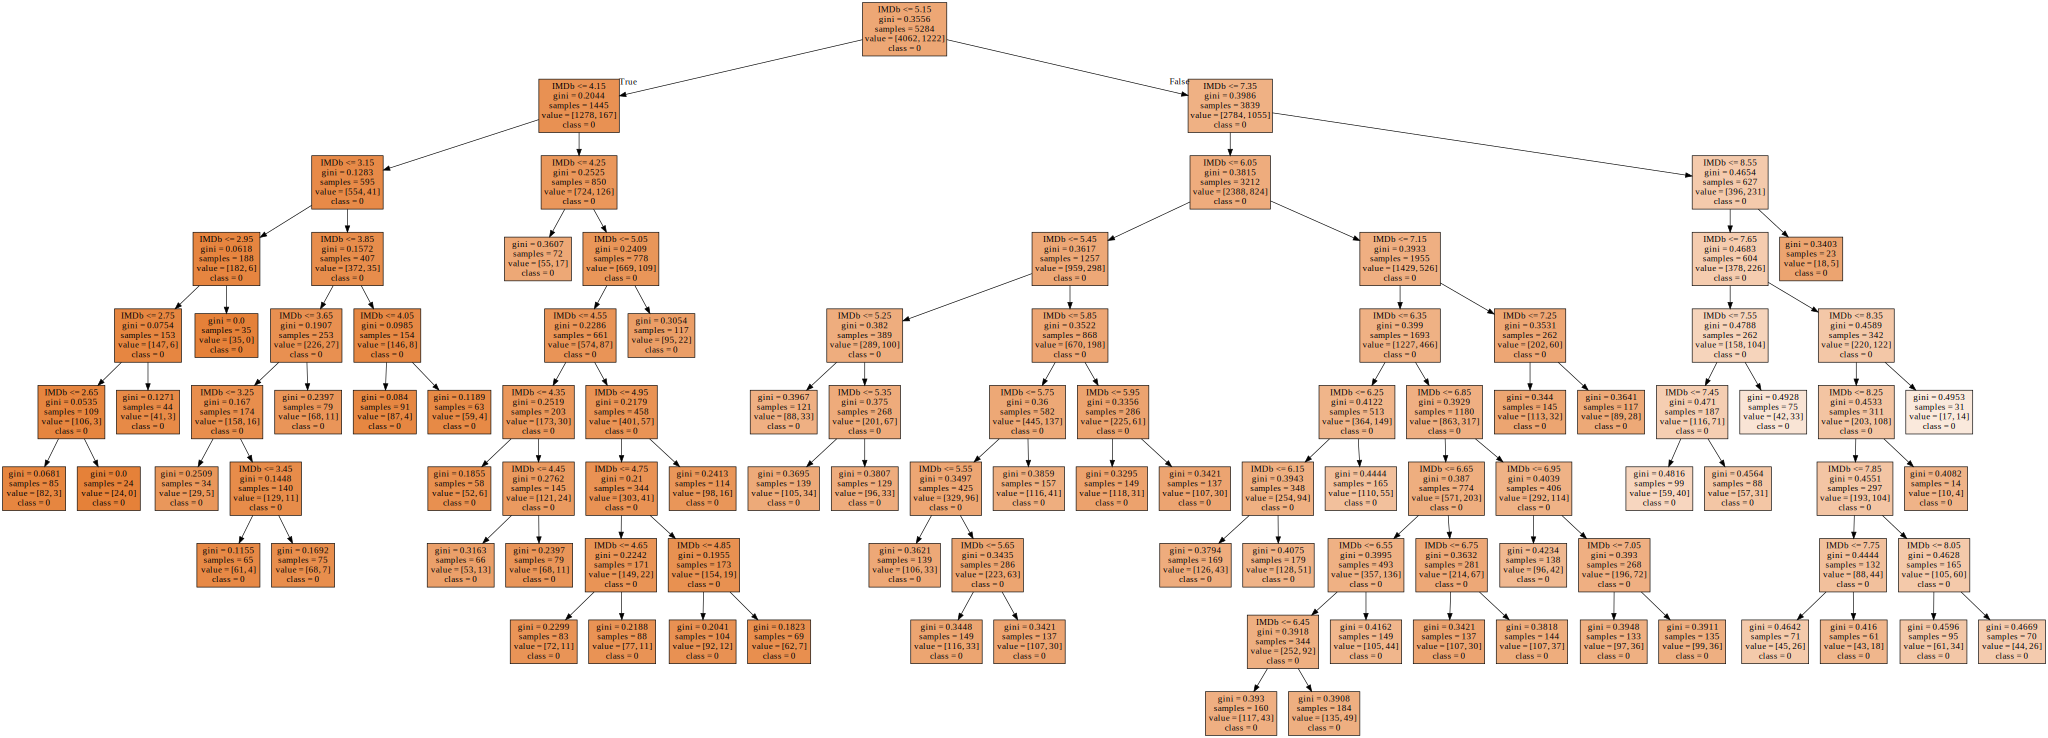

In [245]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [246]:
from sklearn.metrics import accuracy_score

In [247]:
train_score_1 = accuracy_score(y_train, y_pred_t1)*100
train_score_1

76.87358062074186

In [248]:
train_score_2 = accuracy_score(y_train, y_pred_t2)*100
train_score_2

76.87358062074186

In [249]:
test_score_1 = accuracy_score(y_test, y_pred1)*100
test_score_1

78.03632236095346

In [250]:
test_score_2 = accuracy_score(y_test, y_pred2)*100
test_score_2

78.03632236095346

In [251]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1375
           1       0.00      0.00      0.00       387

    accuracy                           0.78      1762
   macro avg       0.39      0.50      0.44      1762
weighted avg       0.61      0.78      0.68      1762



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [252]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1375
           1       0.00      0.00      0.00       387

    accuracy                           0.78      1762
   macro avg       0.39      0.50      0.44      1762
weighted avg       0.61      0.78      0.68      1762

